In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Gradient Descent With Linear Regression
$$y = wx + b$$
Our goal for this notebook is to make an iterative process to guess the values for w and b

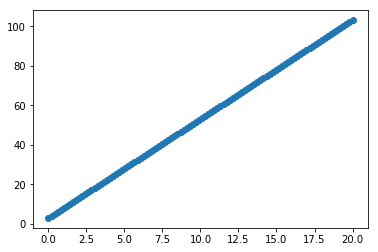

In [2]:
# First let's define x, y, w, b
x = np.linspace(0, 20, 100)
w = 5
b = 3
y = (w*x + b)

plt.scatter(x, y)
plt.show()

In real world data, however, we have noise. For example, let's say we had you take a questionnaire twice. 
It could be the case that you put down different answers for the questionnaire the first time you took it
in comparison to the second time you took it. So while there may be some true y-result of what you actually
meant to put in the questionnaire, perhaps some noise due to your mood, whether you're hungry, or other external
factors caused you to add some noise to your answers leading you to put down 2 different results for the same
questionnaire.

For this reason, statisticians and machine learning engineers cannot neglect the importance of noise! Instead of training on y, it would be a better real world example if we trained on a noisy y dataset. We define noisy_y to be the addition of some actual underlying label y which we do not observe, and some noise factor $\epsilon$ (epsilon) which we often normally distribute. 

noisy_y are the values of y which we actually observe within our data sets.
$$noisy\_y = y + \epsilon$$

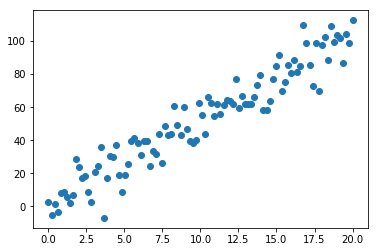

In [3]:
epsilon = np.random.normal(size=(100))*10 # normally distributed noise
noisy_y = y + epsilon

plt.scatter(x, noisy_y)
plt.show()

Our Goal is to have our $\theta$ hyperparameters converge into the values of w, and b. We will do so by minimizing our loss function J (also known as argmin(J)). 

We will also define $\hat{y}$ to be our estimations of what we expect the value of y should be given some x input data by using some guess $\theta$. Our initial guess for yhat will be really bad which should be reflected by our loss function having a high value.

Our function $J_\theta$ represents how wrong our guesses $\hat{y}$ are with respect to noisy_y. The loss function we will use for J is MSE (mean squared error). This loss function is a very common function for regression based problems due to a probabilistic derivation of which we will not go into during this notebook.

$$\hat{y} = \theta_0x + \theta_1$$
$$J_\theta(noisy\_y | x) = MSE_{\theta}(noisy\_y | x) = \sum(noisy\_y - \hat{y})^2$$

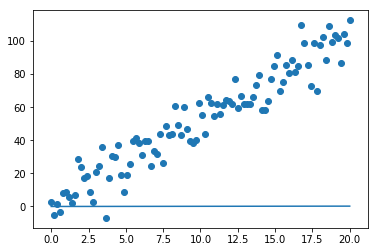

In [4]:
theta = [0.01, -0.01]

# Let's define our loss function := sum((y-yhat)**2), and our hypothesis predictiction, yhat := theta[0] * x + theta[1]
def yhat(x):
    return theta[0] * x + theta[1]

def mean_squared_error(noisy_y, x):
    return sum((noisy_y - yhat(x))**2)

# Now let's plot our current guess
plt.plot(x, yhat(x))
plt.scatter(x, noisy_y, label='Our initial guess for {0}x + {1}'.format(w, b))
plt.show()

To converge our $\theta$ values to the actual values for w, and b we will utilize an iterative process called gradient descent. We could solve this algebraically by setting $\nabla_{\theta}J = 0$ and solving for values of $\theta$ however by doing so we will need to do various calculations including inverting matrices. The inversion of a matrix is a roughly $n^3$ operation, therefore it becomes unweidly in networks which have millions of hyper parameters. 

Instead we will use a method called Gradient Descent. Gradient Descent simply utilizes a loss function and minimizes the loss function with respect to $\theta$ to make your guesses more accurate.  

First it finds the direction to move $\theta$ by using partial derivatives. If $\frac{\delta J}{\delta \theta_0}$ is positive, then we know increasing $\theta_0$ makes your predictions less accurate as your loss would increase, hence later on we will be subtracting our partial derivatives. Also note that as your guesses get closer to the true values of w and b, your derivatives will become flatter and thus smaller. dJ/d$\theta$ therefore, naturally decreases over time causing you to take smaller steps as you slowly converge.

It also attempts to scale how much you move in a single direction through a value known as the learning rate, also commonly referred to as $\alpha$ (alpha). 

To actually move our theta closer to the true values, we use an update rule.

The general Gradient Descent update rule is as follows:

$$\theta = \theta - \alpha\nabla_\theta{J}$$

We will define $\alpha$ as $1*10^{-4}$. 

Let's recall that

$$J_\theta(noisy\_y) = \sum(noisy\_y - \hat{y})^2$$
and
$$\hat{y} = \theta_0x + \theta_1$$

Therefore our partial derivatives are as follows:
$$\frac{\delta J}{\delta \theta_0} = (\sum\frac{noisy\_y - \hat{y}}{2})(-x)$$

$$\frac{\delta J}{\delta \theta_1} = (\sum\frac{noisy\_y - \hat{y}}{2})(-1)$$

Finally, because Gradient Descent is an iterative approach we must specify how many times do we repeat our learning update rule until we slowly converge. We typically define the number of update steps as the number of epochs. 

This method enables us to slowly converge our hyperparameters to some values which give us good guesses for noisy_y. We can do this iterative approach faster and with larger amounts of hyperparameters than we would through directly solving for the optimal values of $\theta$.


Estimated 5.1654635751350675x + 0.540319568880259


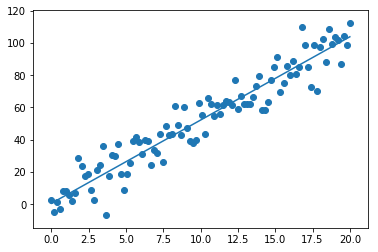

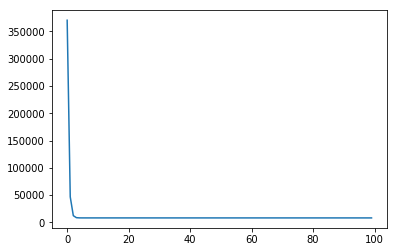

In [5]:
# learning rate/Alpha
learning_rate = 1e-4

# Let's define the number of training iterations and a metric to record our loss
epochs = 100
historical_loss = []

# Finally let's train
for i in range(epochs):
    historical_loss.append(mean_squared_error(noisy_y,x)) # record loss
    guesses = yhat(x) # make our prediction
    theta[0] -= learning_rate * sum(((noisy_y - guesses)/2) * (-1) * x) # update theta[0] (our guess for w)
    theta[1] -= learning_rate * sum(((noisy_y - guesses)/2) * (-1) * (1)) # update theta[1] (our guess for b)
    
# Plot our regression
print('Estimated {0}x + {1}'.format(theta[0], theta[1]))
plt.plot(x, yhat(x))
plt.scatter(x, noisy_y)
plt.show()

# Plot our loss function
plt.plot(historical_loss)
plt.show()

At this point you're probably scratching your head as to how I derived
$$\frac{\delta J}{\delta \theta_0} = (\sum\frac{noisy\_y - \hat{y}}{2})(-x)$$

$$\frac{\delta J}{\delta \theta_1} = (\sum\frac{noisy\_y - \hat{y}}{2})(-1)$$

Let's once again recall that

$$J_\theta(noisy\_y) = \sum(noisy\_y - \hat{y})^2$$

and

$$\hat{y} = \theta_0x + \theta_1$$

So here's some definitions:

$$\frac{\delta J}{\delta(noisy\_y - \hat{y})} = (\sum\frac{noisy\_y - \hat{y}}{2})$$

$$\frac{\delta (noisy\_y - \hat{y})}{\delta \hat{y}} = -1$$

$$\frac{\delta \hat{y}}{\delta \theta_0} = x$$

$$\frac{\delta \hat{y}}{\delta \theta_1} = 1$$


Now for the partial derivative derivations:

$$\frac{\delta J}{\delta \theta_0} = 
\frac{\delta J}{\delta(noisy\_y - \hat{y})}
\frac{\delta (noisy\_y - \hat{y})}{\delta \hat{y}}
\frac{\delta \hat{y}}{\delta \theta_0} = (\sum\frac{noisy\_y - \hat{y}}{2})(-1)(x)$$

And finally: 

$$\frac{\delta J}{\delta \theta_1} = 
\frac{\delta J}{\delta(noisy\_y - \hat{y})}
\frac{\delta (noisy\_y - \hat{y})}{\delta \hat{y}}
\frac{\delta \hat{y}}{\delta \theta_1} = (\sum\frac{noisy\_y - \hat{y}}{2})(-1)(1)$$
